In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from astropy.io import fits
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [9]:
cube = fits.open("/home/milic/data/scratch/sr_inverted.fits")[0].data

In [10]:
cube.shape

(146, 116, 129, 9)

In [11]:
I = cube[:,:,:,7] + cube[:,:,:,8]
I.shape

(146, 116, 129)

In [12]:
Bh = cube[:,:,:,0] * np.sin(cube[:,:,:,1])
Bz = cube[:,:,:,0] * np.cos(cube[:,:,:,1])

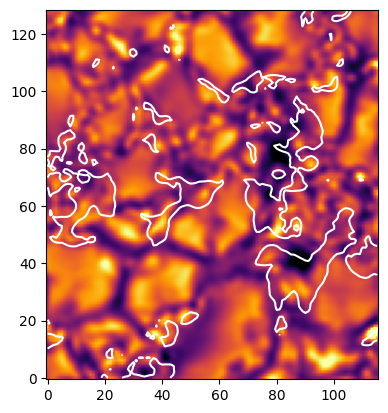

In [13]:
t = 20
plt.imshow(I[t].T, origin='lower', cmap='inferno', vmin=0.7,vmax=1.3)
plt.contour(Bh[t].T, [500],colors='white')

In [14]:
Bx = Bh * np.cos(cube[:,:,:,2])

In [15]:
By = Bh * np.sin(cube[:,:,:,2])

In [16]:
Bxa = Bx[:, ::2, ::2]
Bya = By[:,::2,::2]

In [17]:
x = np.arange(Bxa.shape[1])*2.0
y = np.arange(Bya.shape[2])*2.0

In [18]:
X,Y = np.meshgrid(x,y)

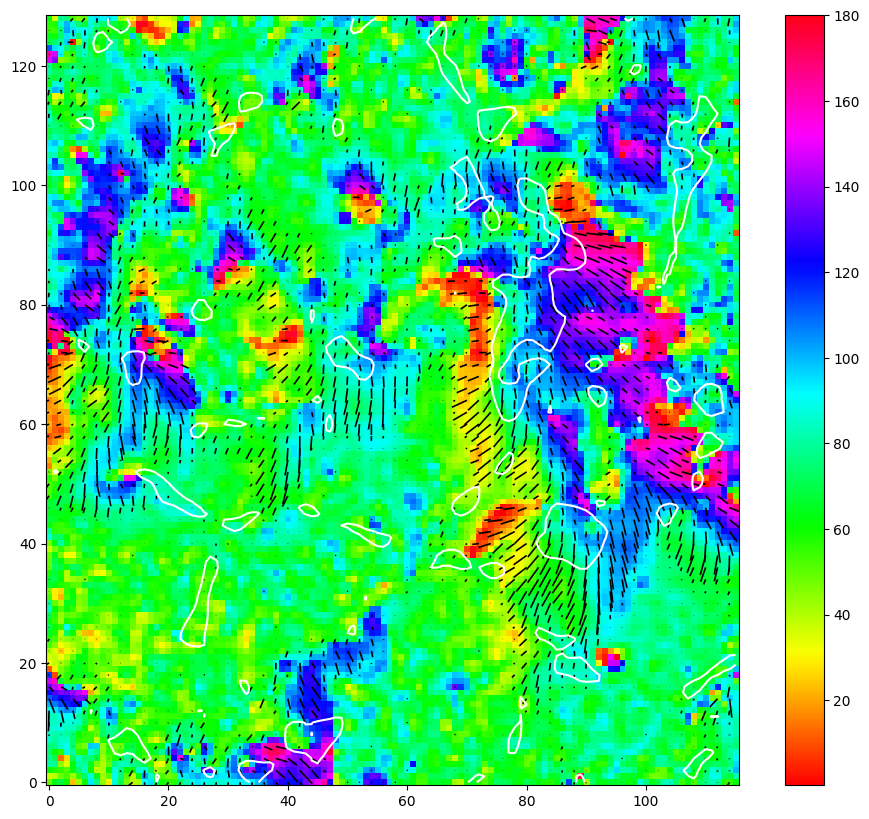

In [19]:
plt.figure(figsize=[12,10])
plt.imshow(np.degrees(cube[t,:,:,2].T), origin='lower', cmap='hsv')
plt.colorbar()
plt.quiver(X, Y, -Bxa[t].T, -Bya[t].T, scale=20000, headwidth=0)
plt.contour(I[t].T, [0.84], colors='white')

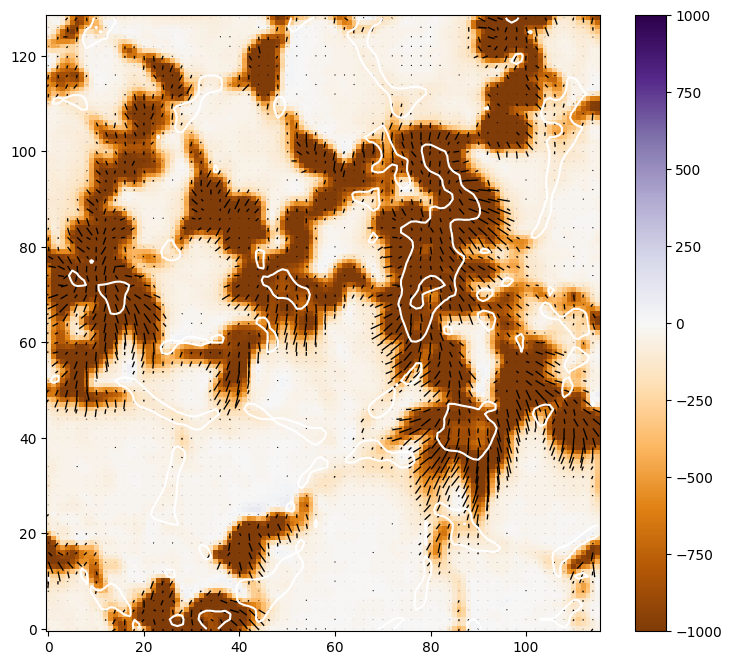

In [21]:
plt.figure(figsize=[9,8])
plt.imshow((Bz[t].T), origin='lower', cmap='PuOr', vmin=-1000, vmax=1000)
plt.colorbar()
plt.quiver(X, Y, -Bxa[t].T, -Bya[t].T, scale=20000, headwidth=0)
plt.contour(I[t].T, [0.86], colors='white')

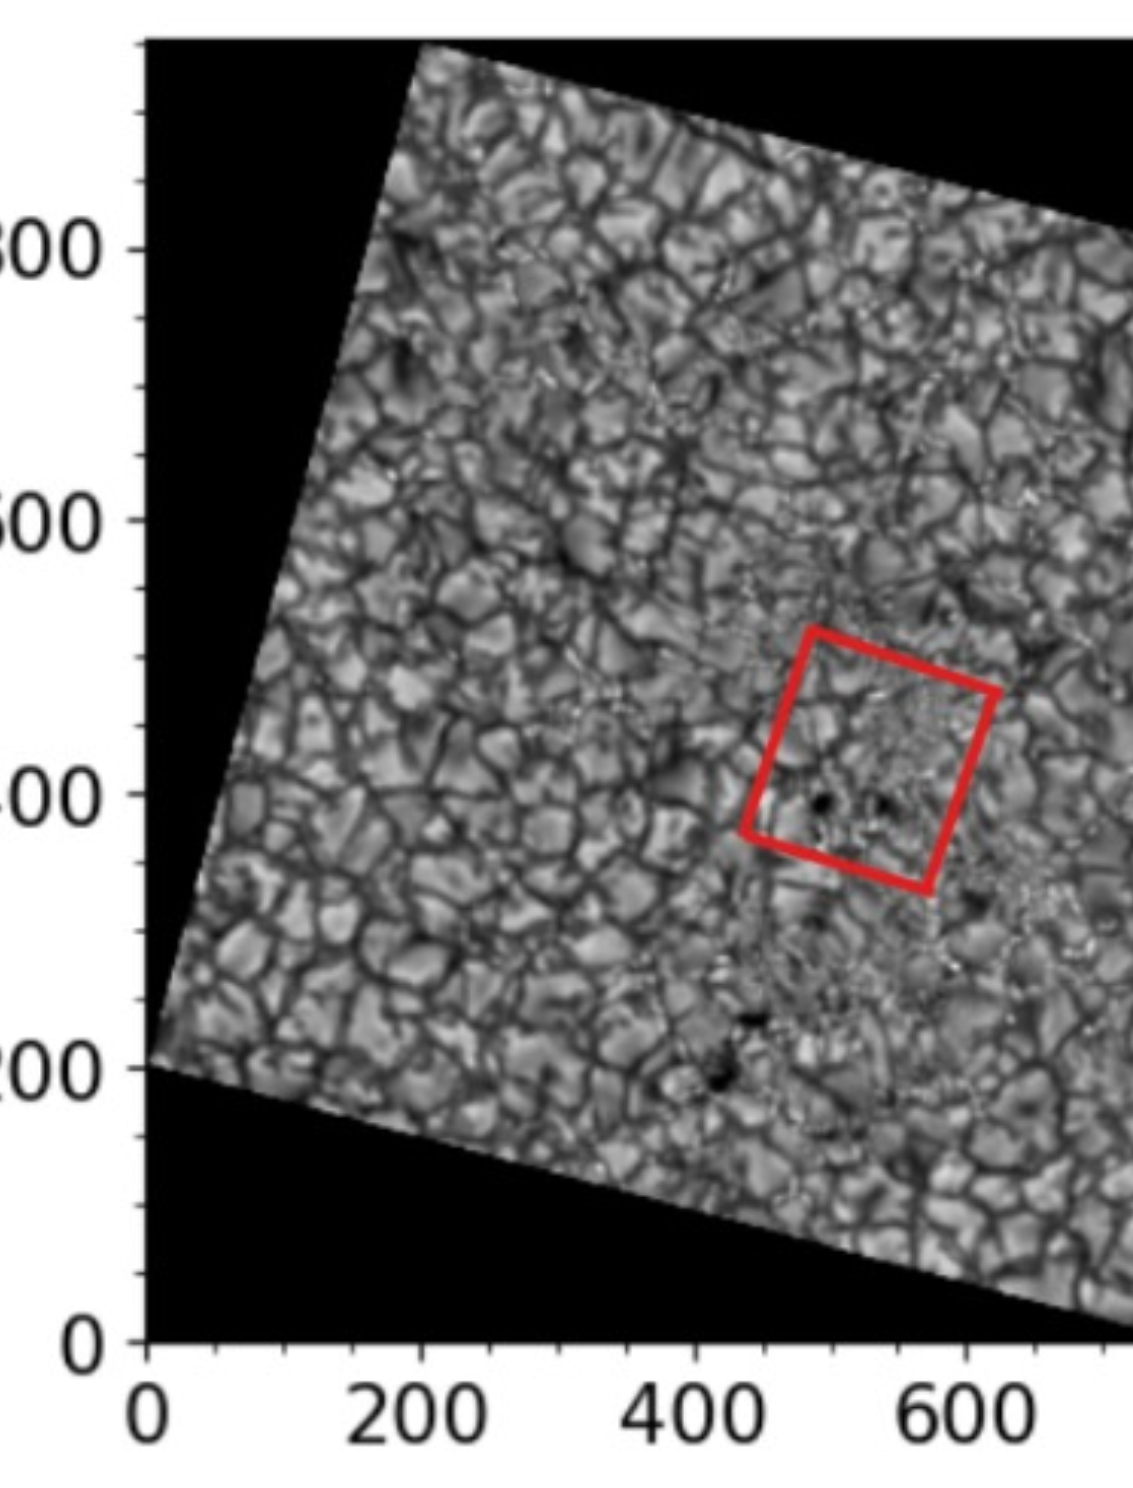

In [22]:
Bxar = Bxa * np.cos(np.radians(15)) - Bya * np.sin(np.radians(15))
Byar = Bya * np.cos(np.radians(15)) + Bxa * np.sin(np.radians(15))

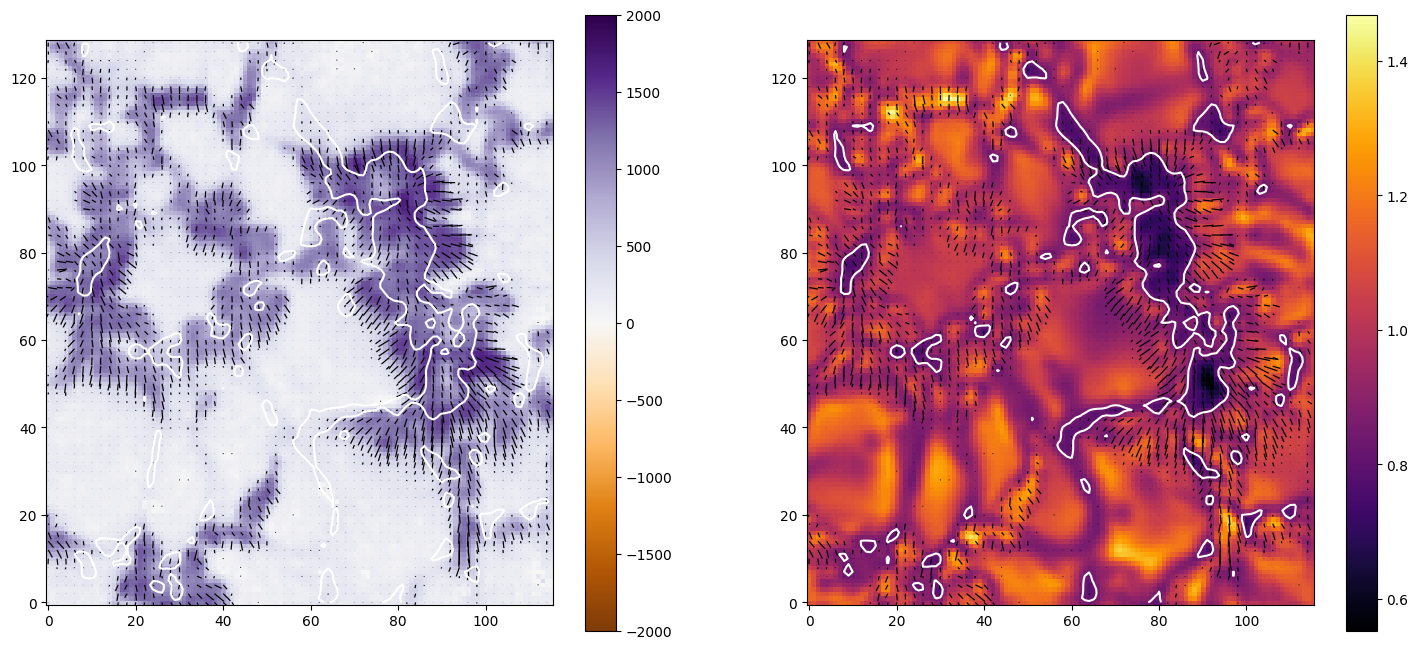

In [23]:
t = 90
plt.figure(figsize=[18,8])
plt.subplot(121)
#plt.imshow((Bz[t].T), origin='lower', cmap='PuOr', vmin=-1500, vmax=1500)
plt.imshow((cube[t,:,:,0].T), origin='lower', cmap='PuOr', vmin=-2000, vmax=2000)
plt.colorbar()
plt.quiver(X, Y, -Bxar[t].T, -Byar[t].T, scale=20000, headwidth=0)
plt.contour(I[t].T, [0.86], colors='white')
plt.subplot(122)
plt.imshow((I[t].T), origin='lower', cmap='inferno')
plt.colorbar()
plt.quiver(X, Y, -Bxar[t].T, -Byar[t].T, scale=20000, headwidth=0)
plt.contour(I[t].T, [0.84], colors='white')
plt.savefig("bh_lines.png", bbox_inches='tight')

In [17]:
from matplotlib.widgets import Slider, Button, RadioButtons

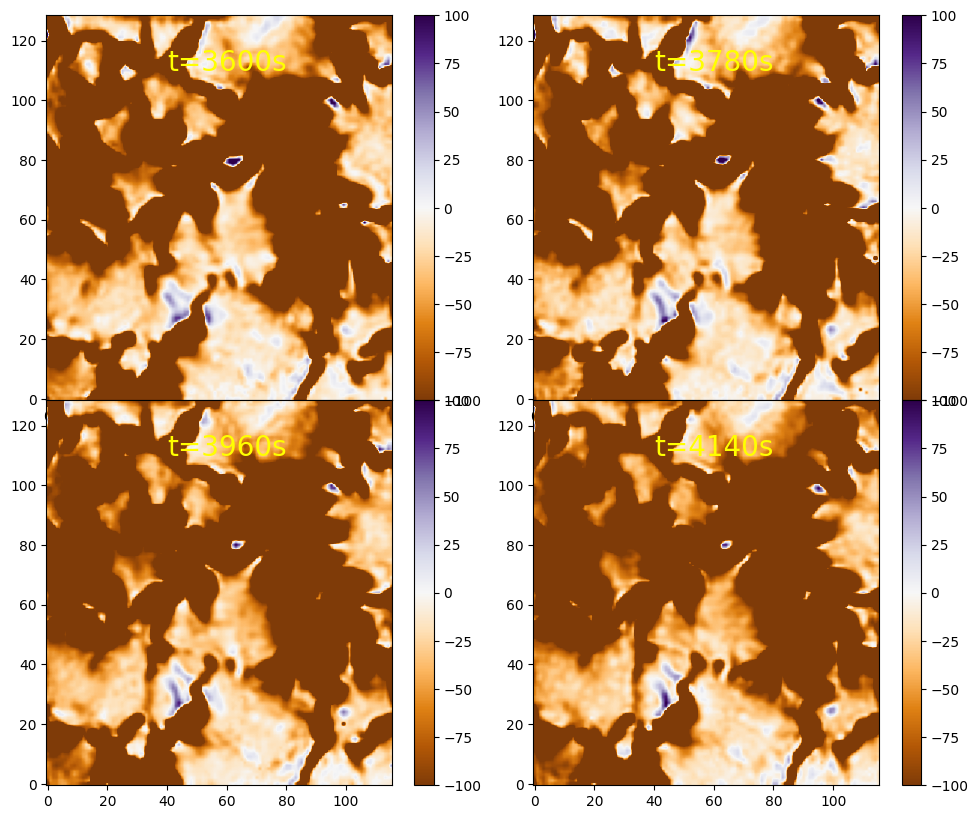

In [24]:

t=60
plt.figure(figsize=[12,10])
for i in range(0,1):
    for j in range(0,4):
        
        plt.subplot(2,2,i*1+j+1)
        plt.imshow((Bz[t].T), origin='lower', cmap='PuOr', vmin=-100, vmax=100)
        plt.text(40,110,"t="+str(t*60)+"s", color='yellow', fontsize=20)
        plt.colorbar()
        #plt.contour(cube[t,:,:,3].T, [0], colors = 'pink')

        t+=3

plt.subplots_adjust(wspace=0.1, hspace=0)
        
plt.savefig("milne_eddington_blos_ev.png", bbox_inches='tight')

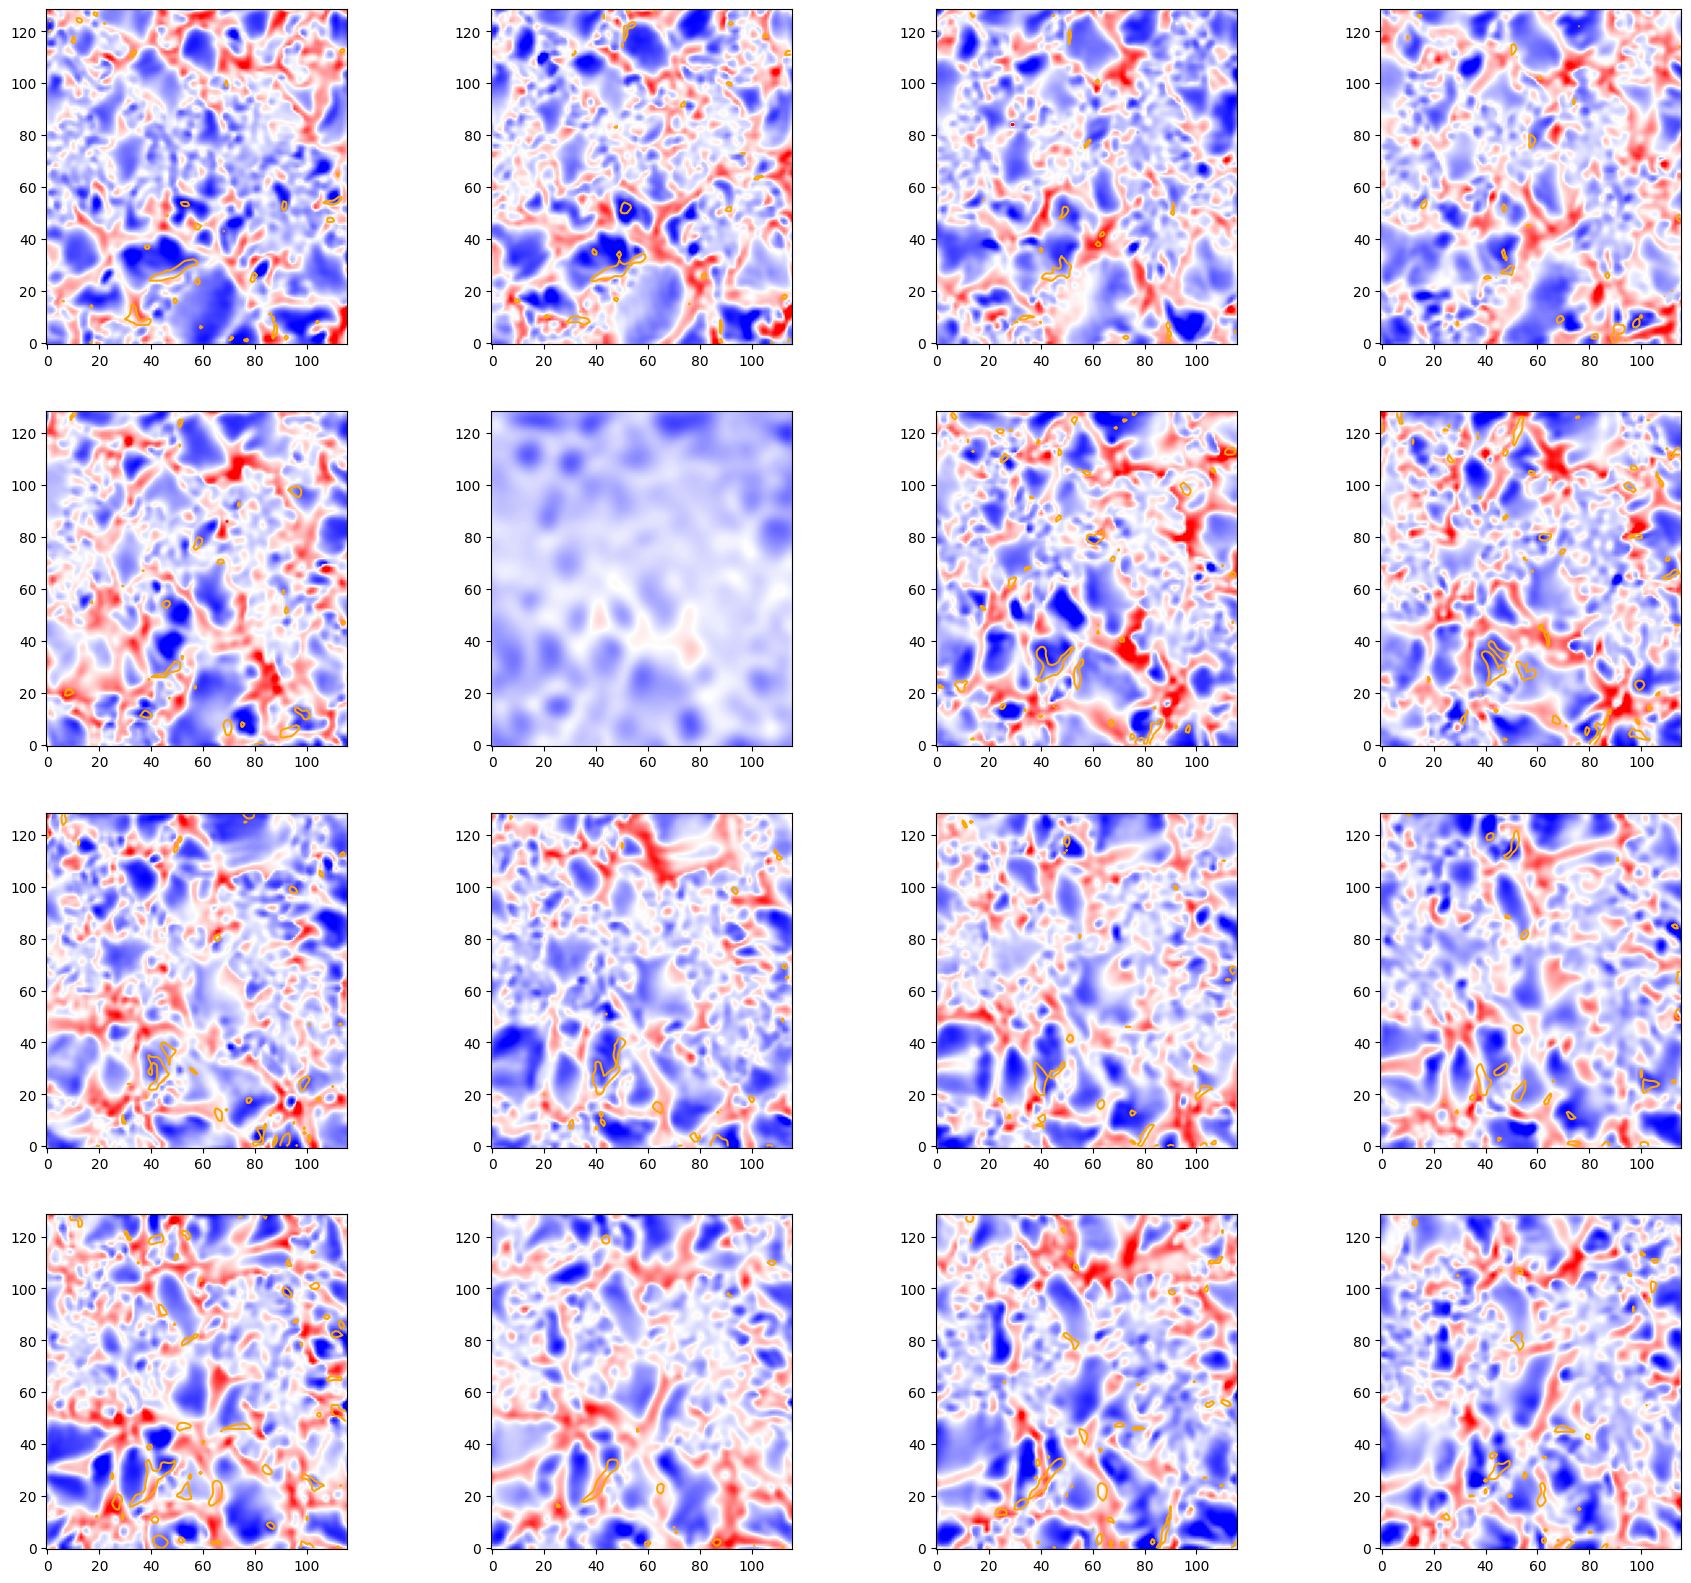

In [25]:
t=0
plt.figure(figsize=[22,20])
for i in range(0,4):
    for j in range(0,4):
        
        plt.subplot(4,4,i*4+j+1)
        plt.imshow((cube[t,:,:,3].T), origin='lower', cmap='bwr', vmin=-2, vmax=2)
        #plt.contour(cube[t,:,:,3].T, [0], colors = 'pink')
        plt.contour(Bz[t,:,:].T, [10], colors = 'orange')
        t += 9

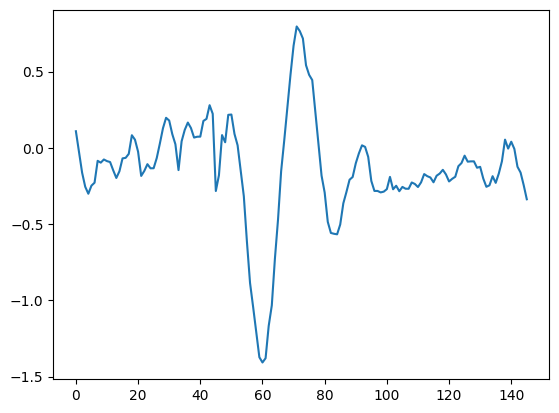

In [19]:
t = np.linspace(148
plt.plot(cube[:,47,22,3])
#plt.plot(cube[:,47,22,0]/2000)

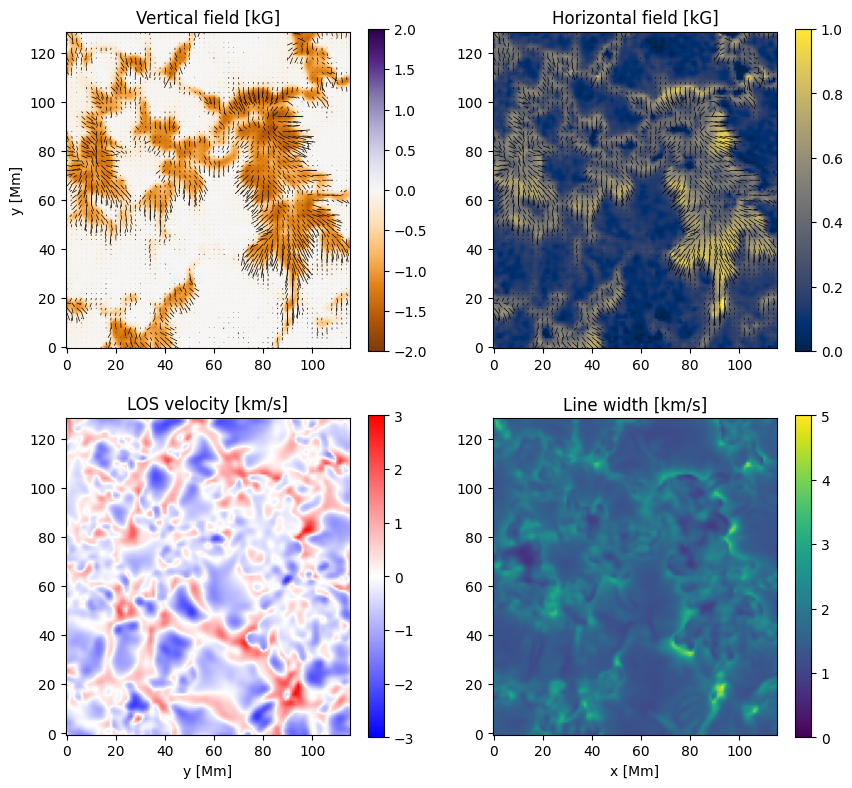

In [47]:
t = 60
plt.figure(figsize=[10.1,9.2])
plt.subplot(221)
plt.imshow((Bz[t].T/1E3), origin='lower', cmap='PuOr', vmin=-2, vmax=2)
plt.title("Vertical field [kG]")
#plt.imshow((cube[t,:,:,0].T), origin='lower', cmap='PuOr', vmin=-2000, vmax=2000)
plt.colorbar()
plt.quiver(X, Y, -Bxar[t].T, -Byar[t].T, scale=15000, headwidth=0)
plt.ylabel("y [Mm]")

#plt.contour(I[t].T, [0.92], colors='white')
plt.subplot(222)
plt.title("Horizontal field [kG]")
plt.imshow((Bh[t].T/1E3), origin='lower', cmap='cividis', vmin=0, vmax=1)
#plt.imshow((cube[t,:,:,0].T), origin='lower', cmap='PuOr', vmin=-2000, vmax=2000)
plt.colorbar()
plt.quiver(X, Y, -Bxar[t].T, -Byar[t].T, scale=15000, headwidth=0)
#plt.xlabel("x [Mm]")
#plt.contour(I[t].T, [0.92], colors='white')

plt.subplot(223)
plt.imshow(cube[t,:,:,3].T, origin='lower', cmap='bwr', vmin=-3,vmax=3)
plt.title("LOS velocity [km/s]")
plt.xlabel("x [Mm]")
plt.xlabel("y [Mm]")
plt.colorbar()

plt.subplot(224)
plt.imshow(cube[t,:,:,4].T/6300 * 3E5, origin='lower', cmap='viridis', vmin=0,vmax=5)
plt.title("Line width [km/s]")
plt.xlabel("x [Mm]")
plt.colorbar()

#plt.quiver(X, Y, -Bxar[t].T, -Byar[t].T, scale=10000, headwidth=0)
#plt.contour(I[t].T, [0.92], colors='white')
#plt.subplot(133)
#plt.imshow(I[t].T, origin='lower', cmap='inferno', vmin=0.6,vmax=1.4)
#plt.colorbar()
#plt.quiver(X, Y, -Bxar[t].T, -Byar[t].T, scale=10000, headwidth=0)
#plt.contour(I[t].T, [0.92], colors='white')

plt.savefig("overview.png", bbox_inches='tight')

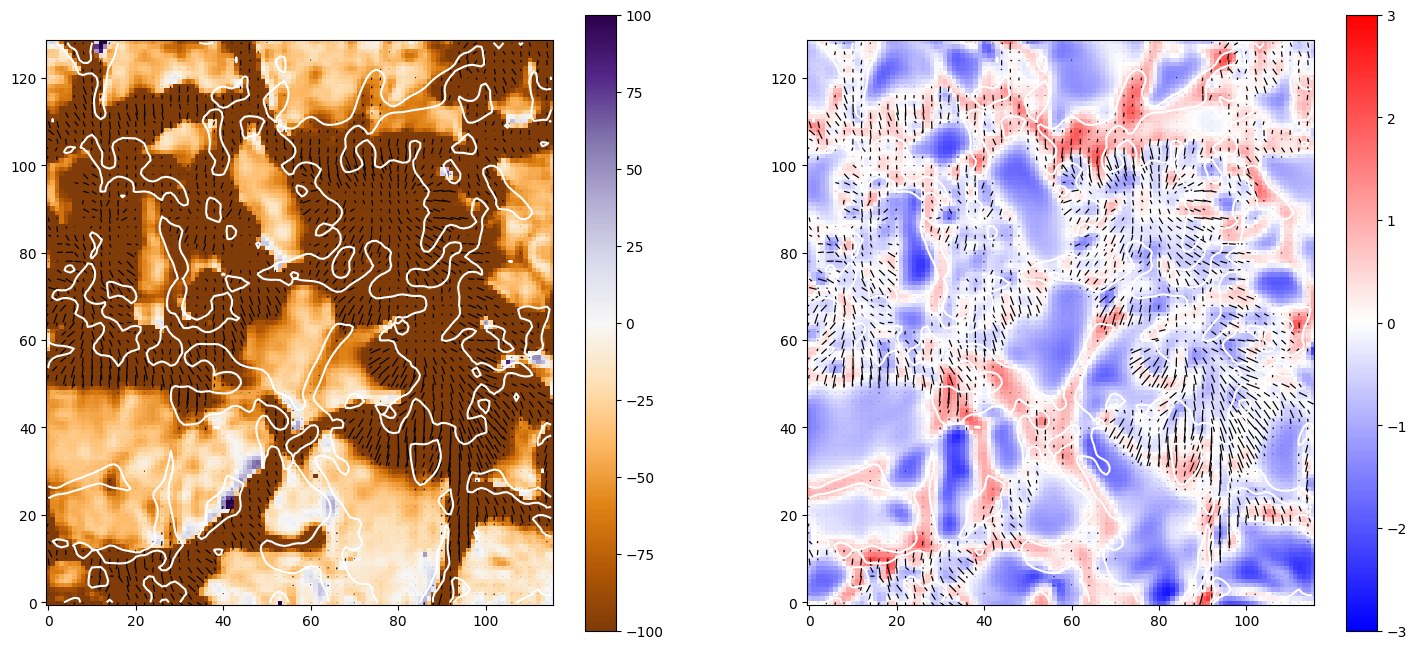

In [27]:
t = 123
plt.figure(figsize=[18,8])
plt.subplot(121)
plt.imshow((Bz[t].T), origin='lower', cmap='PuOr', vmin=-100, vmax=100)
#plt.imshow((cube[t,:,:,0].T), origin='lower', cmap='PuOr', vmin=-2000, vmax=2000)
plt.colorbar()
plt.quiver(X, Y, -Bxar[t].T, -Byar[t].T, scale=20000, headwidth=0)
plt.contour(I[t].T, [0.92], colors='white')
plt.subplot(122)
plt.imshow(cube[t,:,:,3].T, origin='lower', cmap='bwr', vmin=-3,vmax=3)
plt.colorbar()
plt.quiver(X, Y, -Bxar[t].T, -Byar[t].T, scale=20000, headwidth=0)
plt.contour(I[t].T, [0.92], colors='white')
plt.savefig("bh_lines.png", bbox_inches='tight')

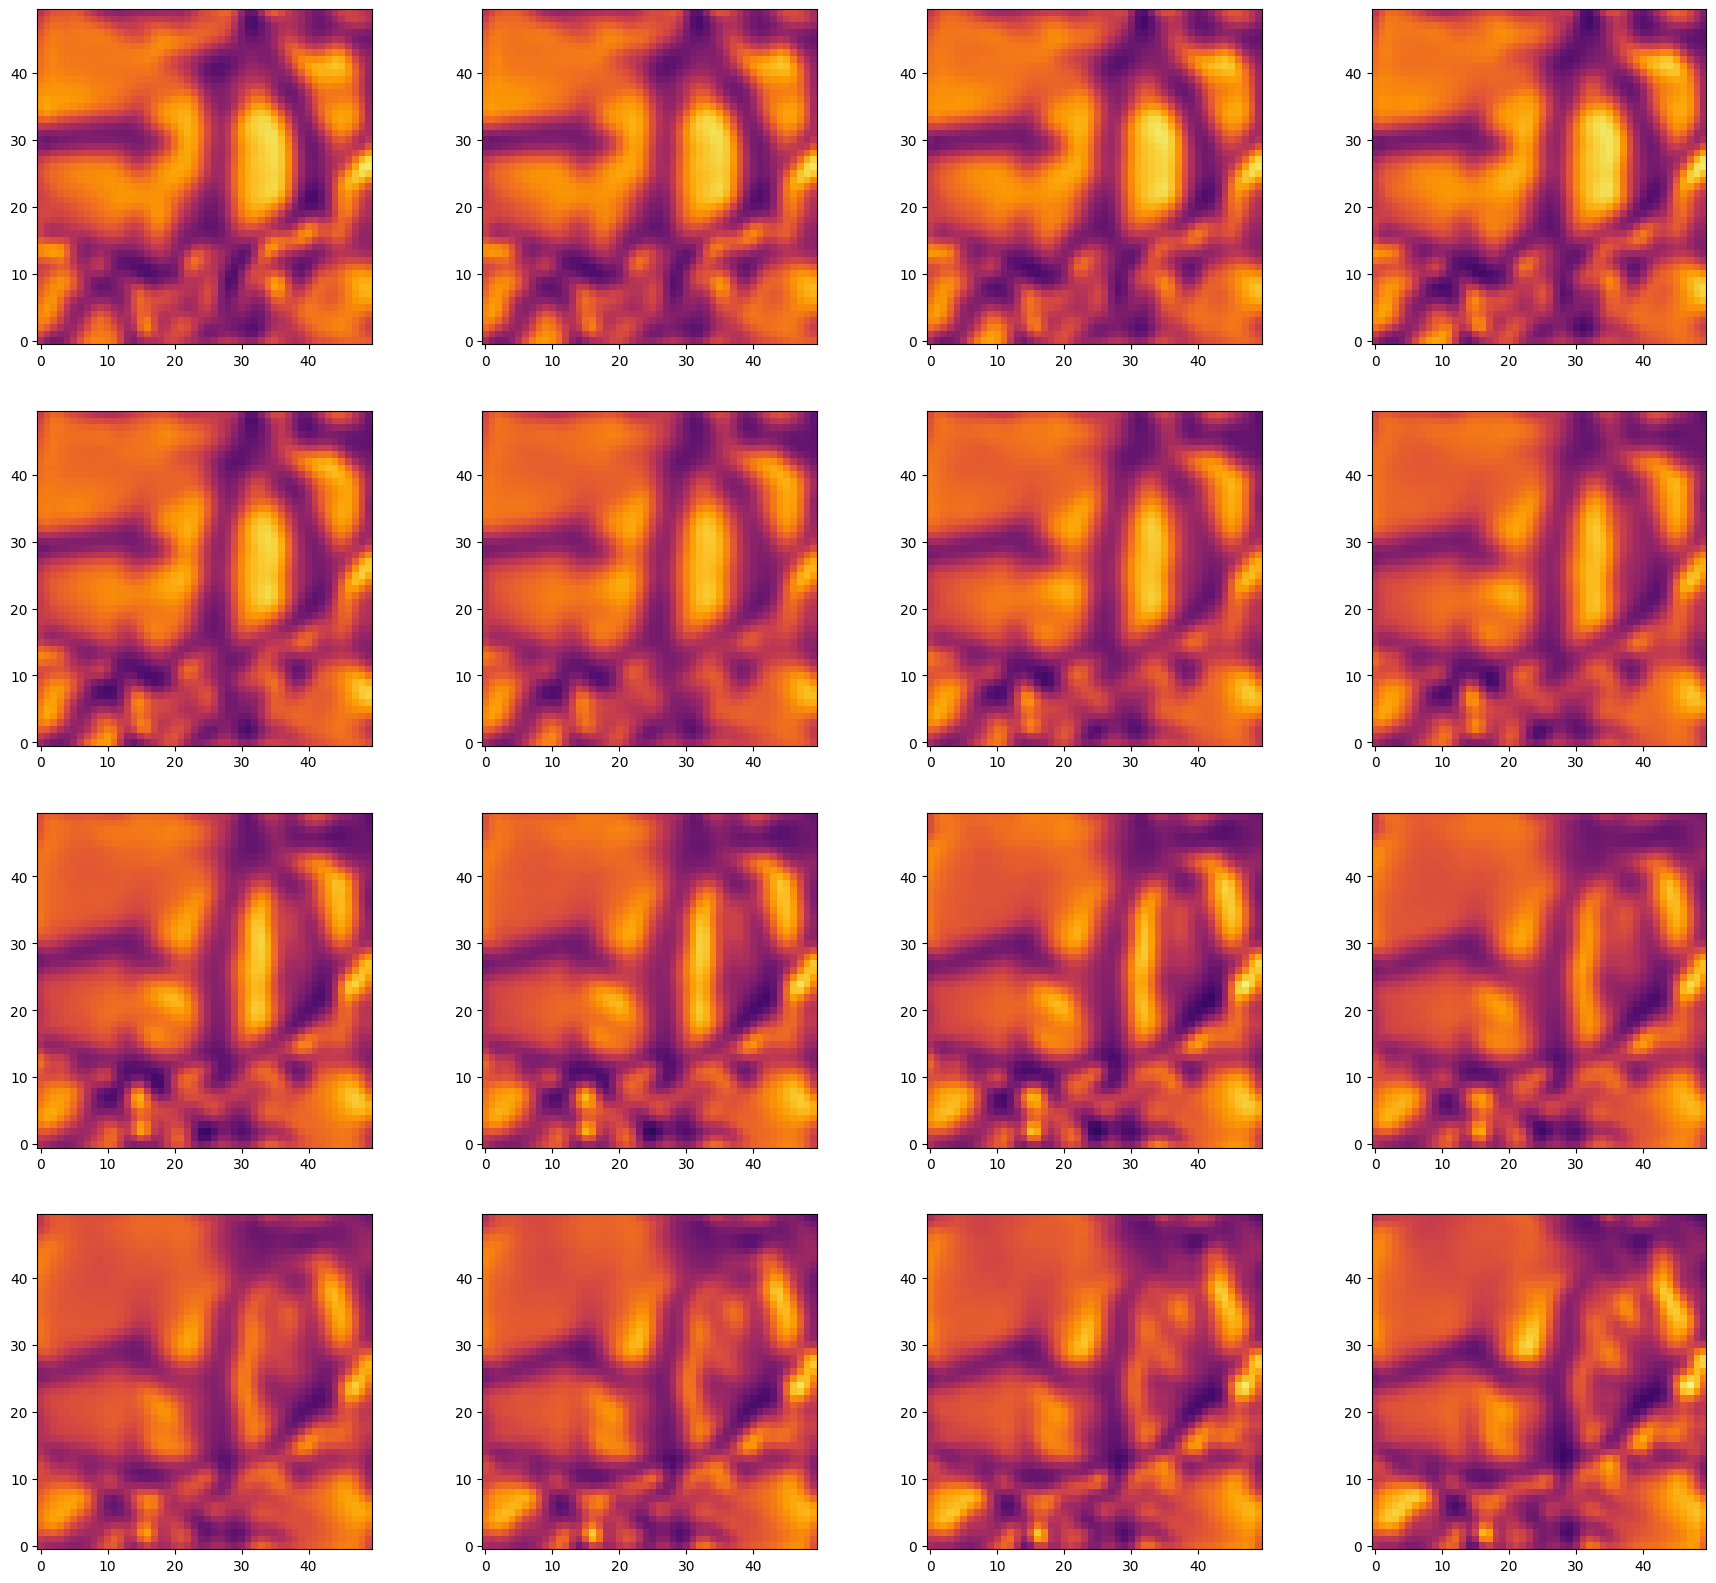

In [28]:
t=110
plt.figure(figsize=[22,20])
for i in range(0,4):
    for j in range(0,4):
        
        plt.subplot(4,4,i*4+j+1)
        plt.imshow(I[t,:50,:50].T, origin='lower', cmap='inferno', vmin=0.6,vmax=1.4)
        #plt.imshow((cube[t,:,:,3].T), origin='lower', cmap='bwr', vmin=-2, vmax=2)
        #plt.contour(cube[t,:,:,3].T, [0], colors = 'pink')
        #plt.contour(Bz[t,:,:].T, [10], colors = 'orange')
        t += 1

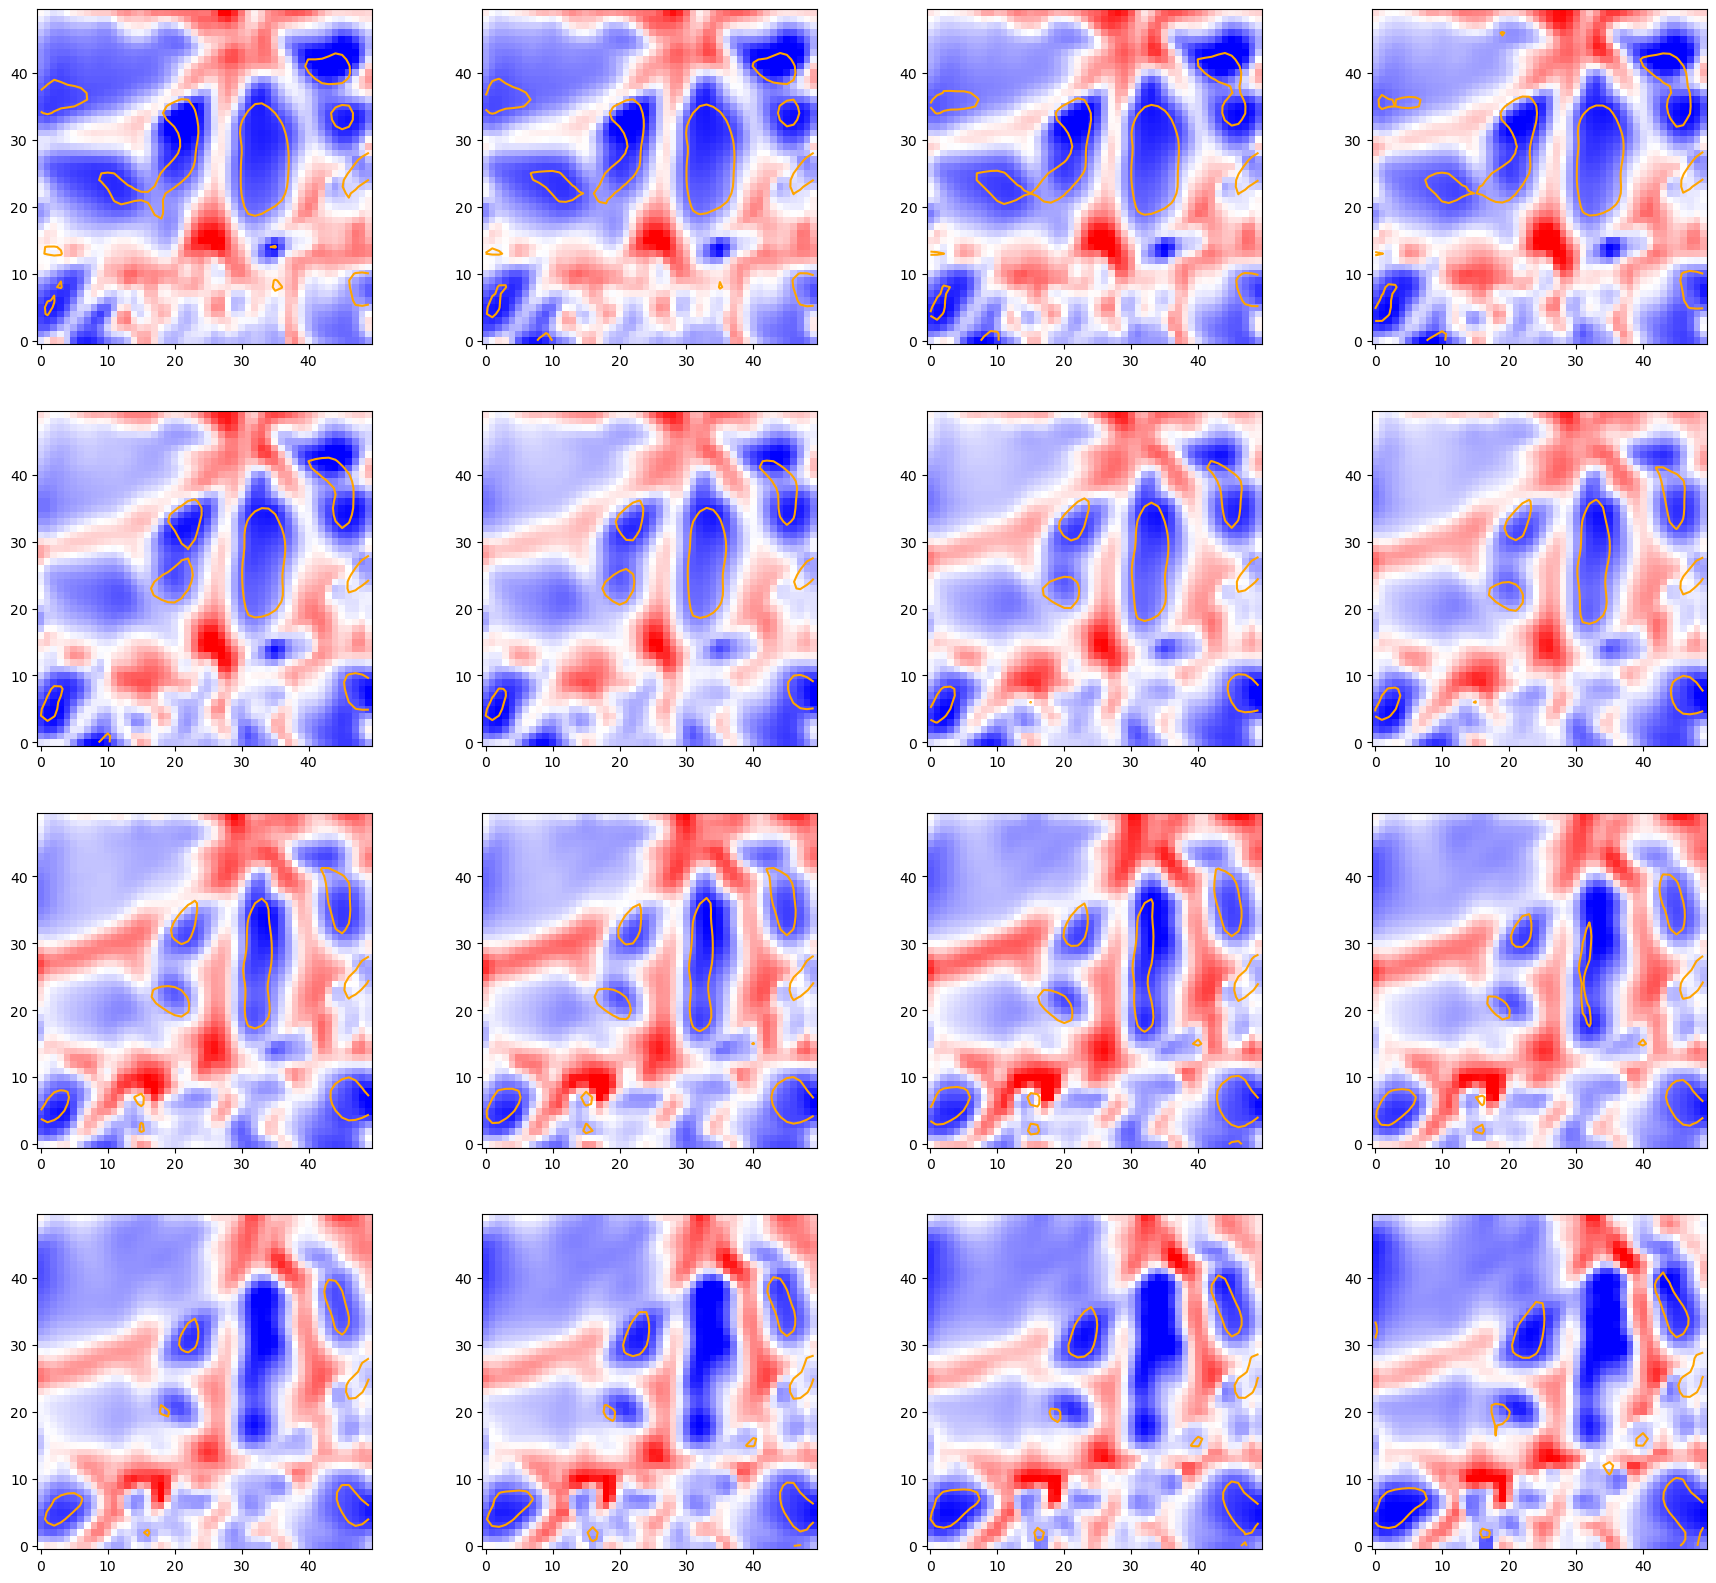

In [123]:
t=110
plt.figure(figsize=[22,20])
for i in range(0,4):
    for j in range(0,4):
        
        plt.subplot(4,4,i*4+j+1)
        plt.imshow((cube[t,:50,:50,3].T), origin='lower', cmap='bwr', vmin=-2, vmax=2)
        #plt.contour(cube[t,:,:,3].T, [0], colors = 'pink')
        #plt.contour(Bz[t,:50,:50].T, [10], colors = 'orange')
        plt.contour(I[t,:50,:50].T, [1.2], colors='orange')
        t += 1

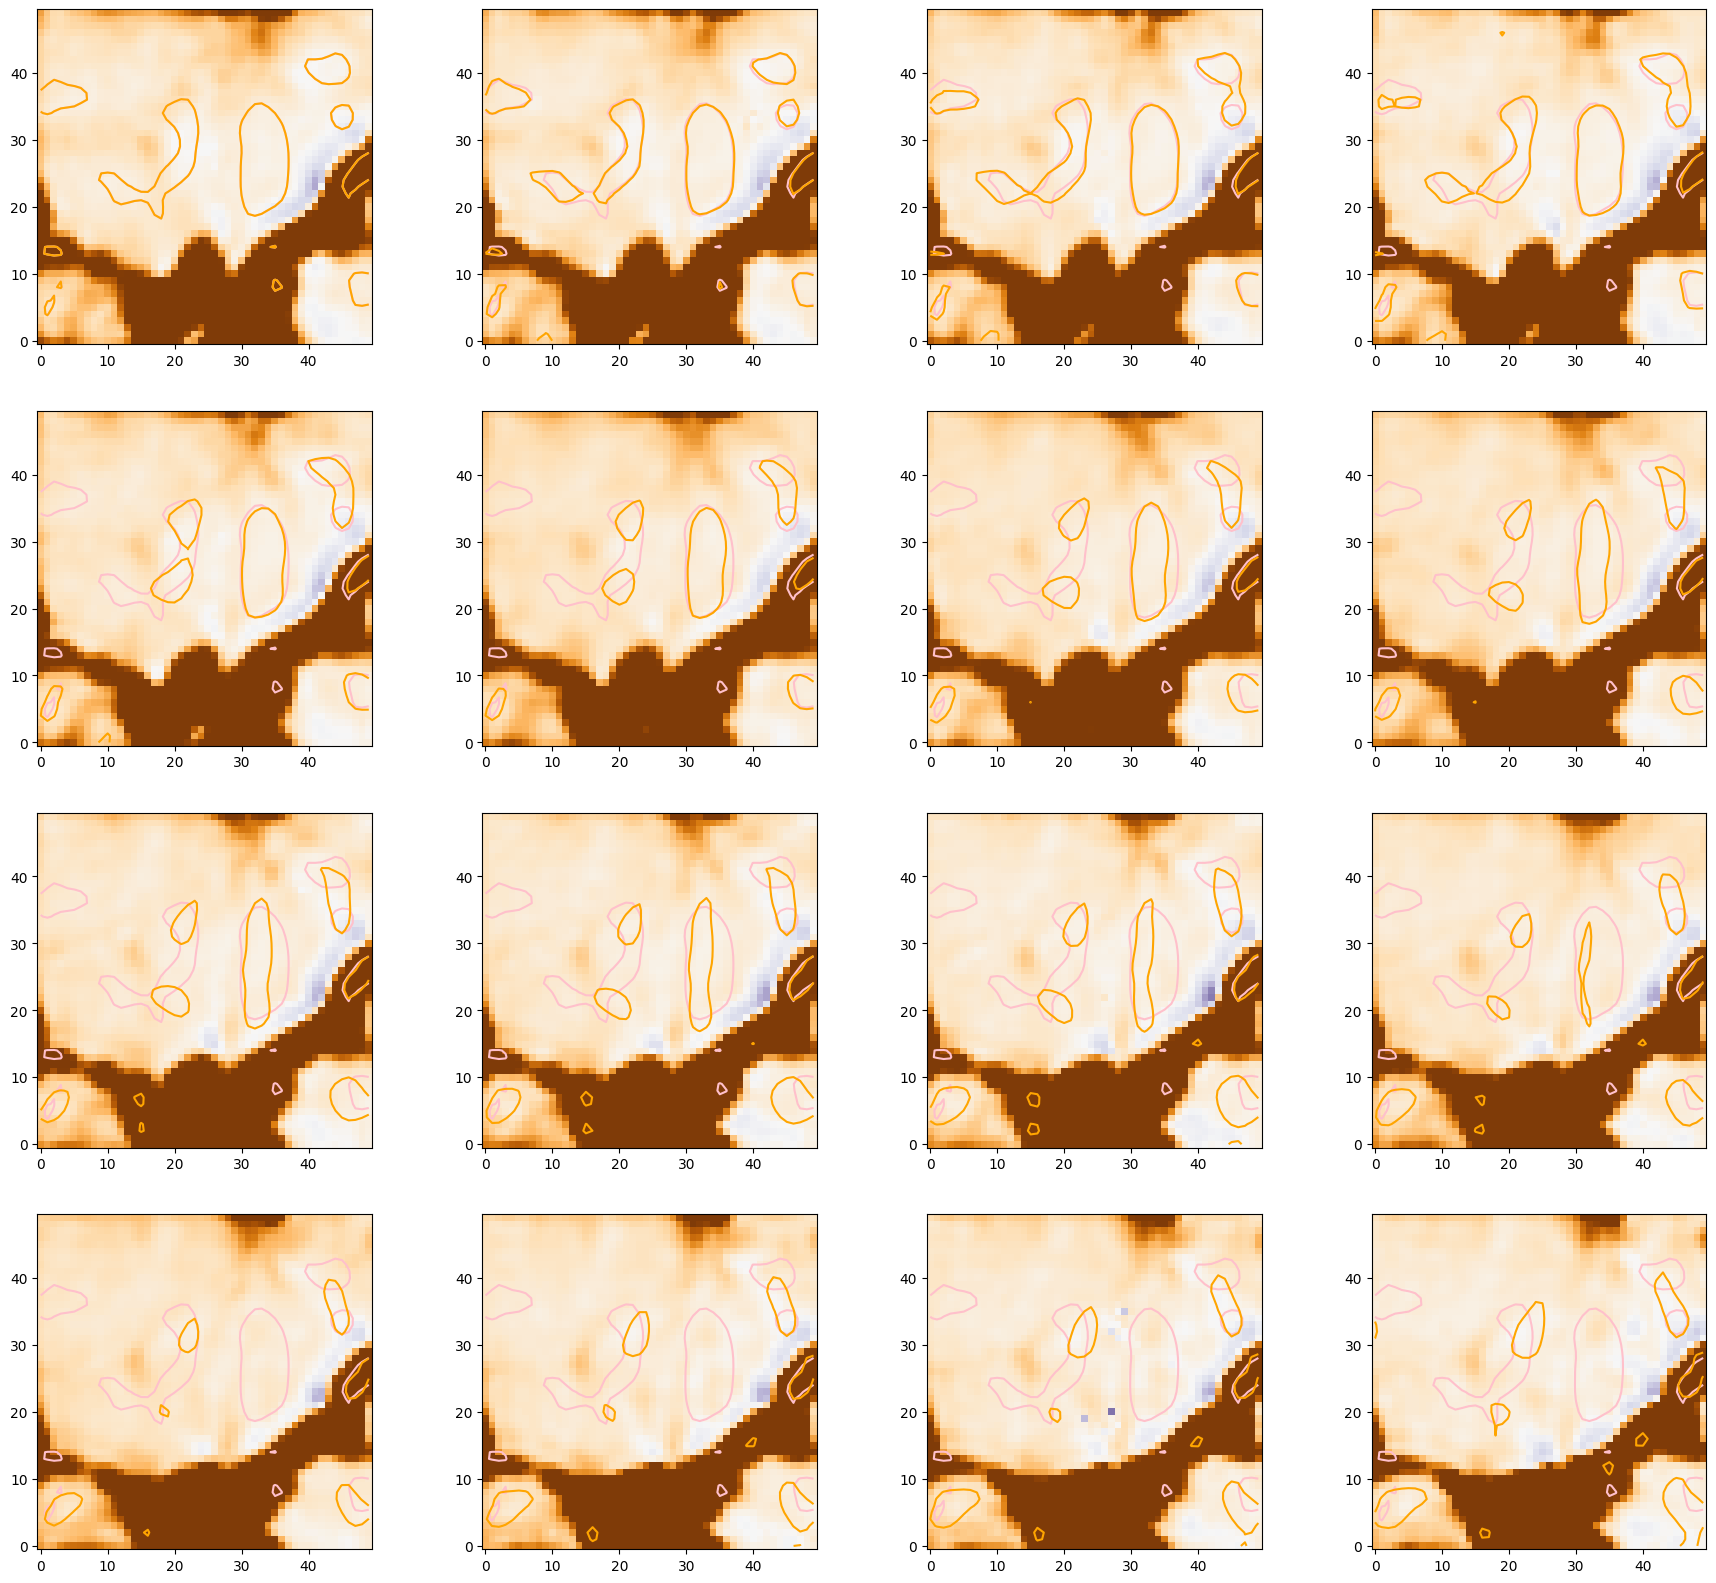

In [29]:
t0=110
t = t0
plt.figure(figsize=[22,20])
for i in range(0,4):
    for j in range(0,4):
        
        plt.subplot(4,4,i*4+j+1)
        plt.imshow((Bz[t,:50,:50].T), origin='lower', cmap='PuOr', vmin=-300, vmax=300)
        #plt.contour(cube[t,:,:,3].T, [0], colors = 'pink')
        #plt.contour(Bz[t,:50,:50].T, [10], colors = 'orange')
        plt.contour(I[t0,:50,:50].T, [1.2], colors='pink')
        plt.contour(I[t,:50,:50].T, [1.2], colors='orange')
        t += 1

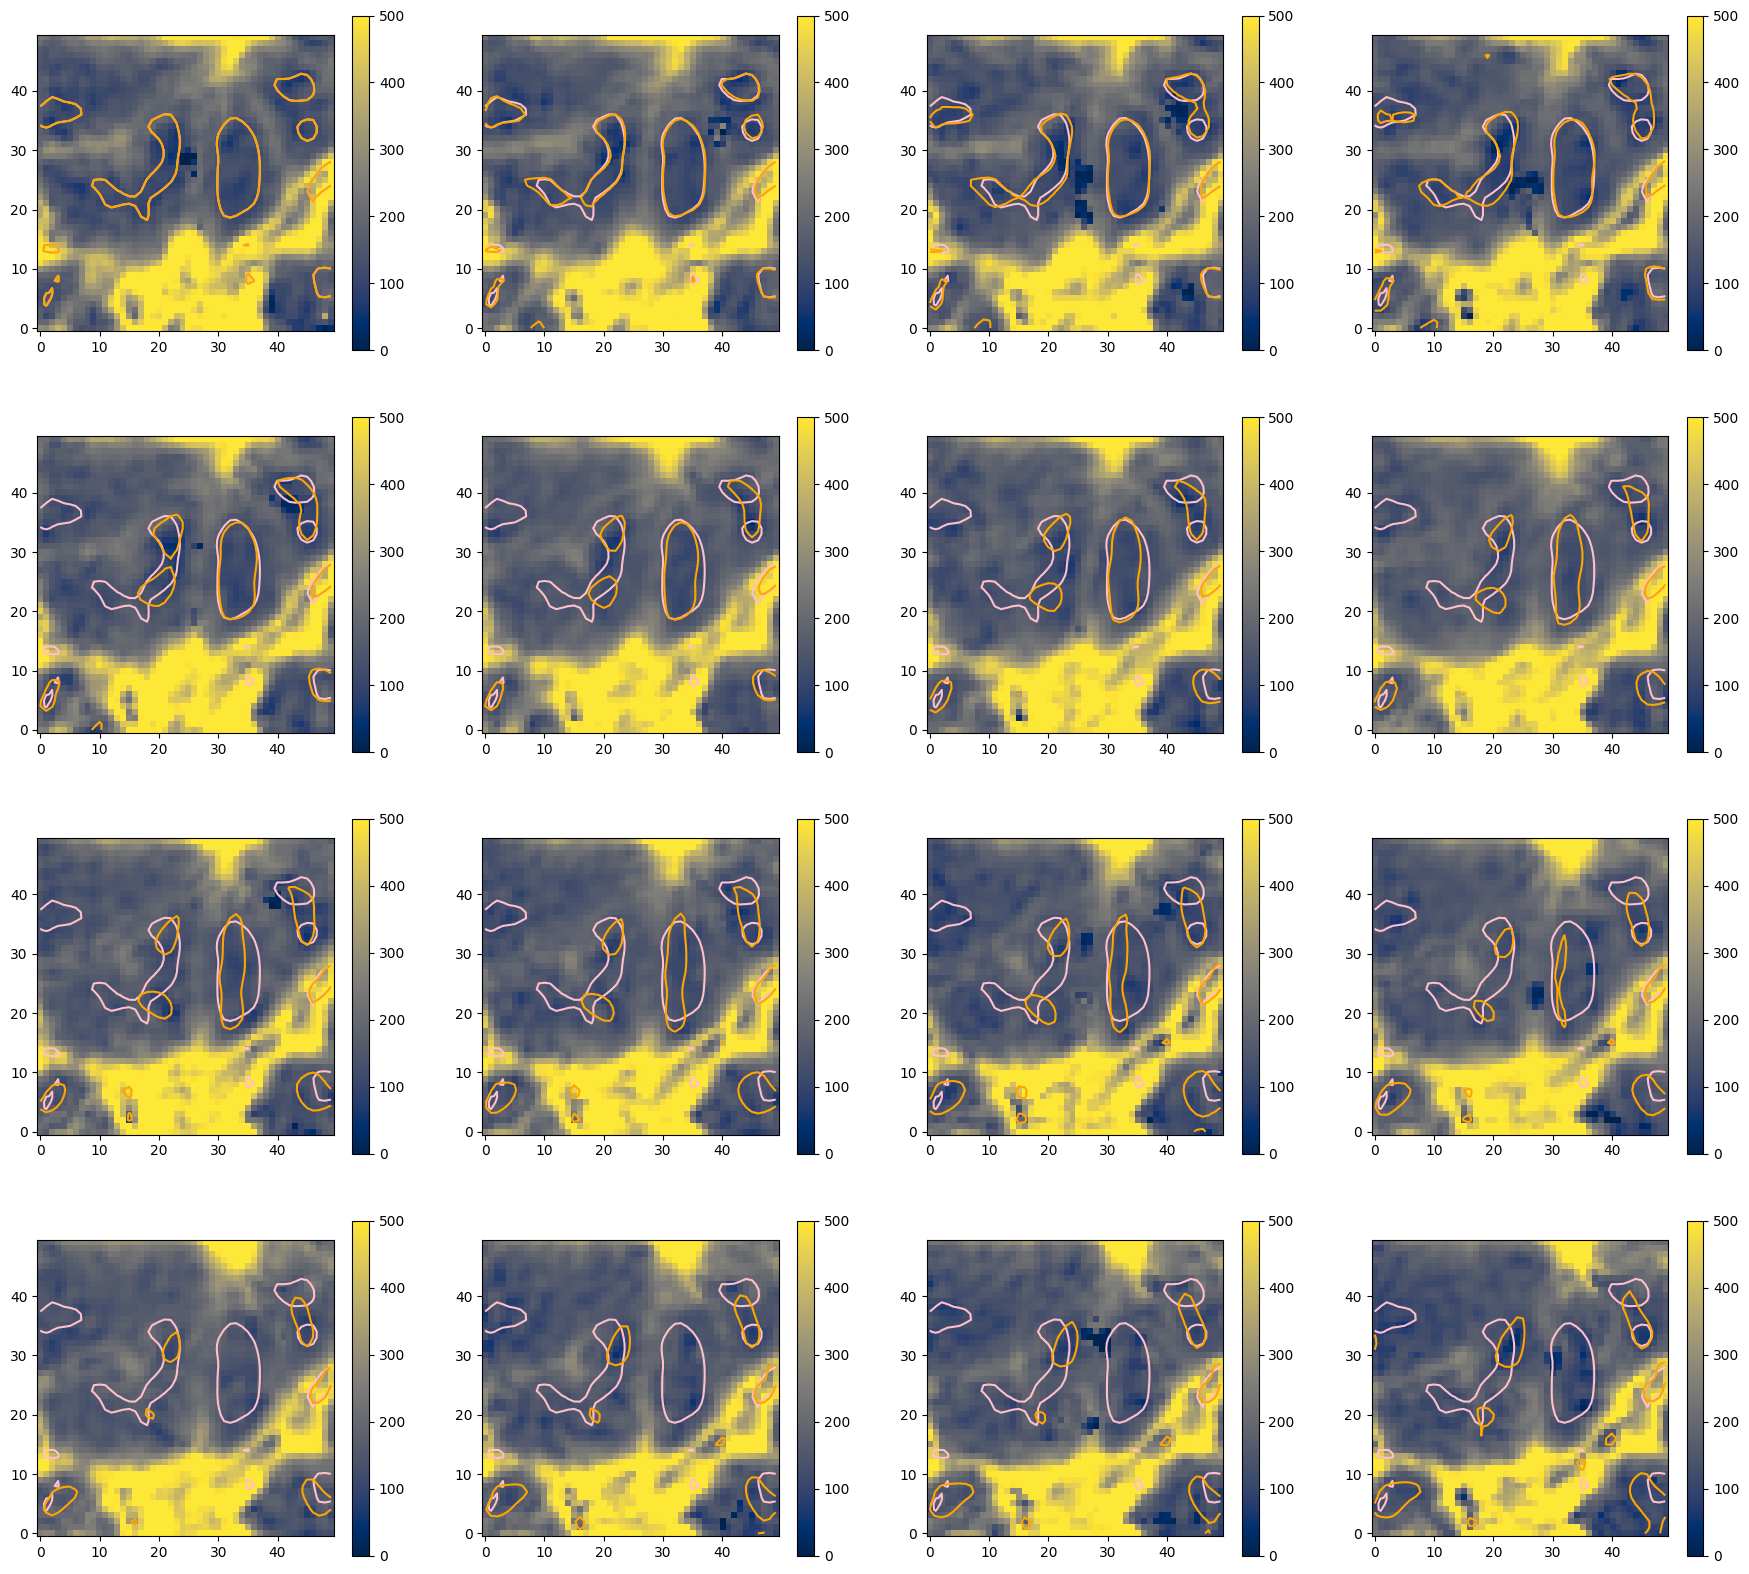

In [32]:
t0=110
t = t0
plt.figure(figsize=[22,20])
for i in range(0,4):
    for j in range(0,4):
        
        plt.subplot(4,4,i*4+j+1)
        plt.imshow((Bh[t,:50,:50].T), origin='lower', cmap='cividis', vmin=0, vmax=500)
        plt.colorbar()
        #plt.contour(cube[t,:,:,3].T, [0], colors = 'pink')
        #plt.contour(Bz[t,:50,:50].T, [10], colors = 'orange')
        plt.contour(I[t0,:50,:50].T, [1.2], colors='pink')
        plt.contour(I[t,:50,:50].T, [1.2], colors='orange')
        t += 1